# Quantum NLP using the Quantum Trainer

In [1]:
!pip install pandas

  Using cached pandas-1.4.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
import numpy as np

BATCH_SIZE = 5
EPOCHS = 6
SEED = 2
len_dataset = 100

In [4]:
import pandas as pd
df = pd.read_csv('dataset1.csv', header=None)
df.rename(columns = {0:'sentence', 1:'label'}, inplace = True)

df.to_csv('dataset.csv', index=None)

In [5]:
df.head(5) 

,sentence,label
0,cook creates complicated dish,1
1,skilful programmer creates code,1
2,skilful cook creates meal,0
3,hacker writes code,1
4,devoted hacker writes code,1


### Read in the data and create diagrams

In [6]:
train_split = int(len_dataset * 0.8)
val_split = int(len_dataset * 0.9)
test_split = int(len_dataset)

df = pd.read_csv('dataset' + '.csv')
df.head()
df_negative = df[df['label'] == 0]
df_positive = df[df['label'] == 1]

df_positive = df_positive[:int(len_dataset/2)]
df_negative = df_negative[:int(len_dataset/2)]

df_final = pd.concat([df_positive, df_negative])

data = list(df_final['sentence'])
labels_raw = list(df_final['label'])

labels = [[x, 1-x] for x in labels_raw]

train_data = data[:train_split]
dev_data = data[train_split:val_split]
test_data = data[val_split:test_split]

train_labels = labels[:train_split]
dev_labels = labels[train_split:val_split]
test_labels = labels[val_split:test_split]

### Create diagrams

In [7]:
!pip install cirq

  Using cached cirq-1.0.0-py3-none-any.whl (7.8 kB)
  Using cached cirq_ionq-1.0.0-py3-none-any.whl (57 kB)
  Using cached cirq_rigetti-1.0.0-py3-none-any.whl (66 kB)
  Using cached cirq_core-1.0.0-py3-none-any.whl (1.8 MB)
  Using cached cirq_web-1.0.0-py3-none-any.whl (594 kB)
  Using cached cirq_pasqal-1.0.0-py3-none-any.whl (31 kB)
  Using cached cirq_aqt-1.0.0-py3-none-any.whl (27 kB)
  Using cached cirq_google-1.0.0-py3-none-any.whl (576 kB)
  Using cached duet-0.2.7-py3-none-any.whl (28 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00:00:01
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Using cached proto_plus-1.22.0-py3-none-any.whl (47 kB)
  Using cached protobuf-3.20.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Using cached google_api_core-1.32.0-py2.py3-none-any.whl (93 kB)
  Using cached pyquil-3.3.0-py3-none-any.whl (221 kB)
  Using cached goog

In [8]:
!pip install lambeq

  Using cached lambeq-0.2.6-py3-none-any.whl (126 kB)
  Using cached tensornetwork-0.4.6-py3-none-any.whl (364 kB)
  Using cached spacy-3.4.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.4 MB)
  Using cached pytket-1.5.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached transformers-4.21.1-py3-none-any.whl (4.7 MB)
  Using cached discopy-0.4.2-py3-none-any.whl
  Using cached torch-1.12.1-cp39-cp39-manylinux1_x86_64.whl (776.4 MB)
  Using cached types_pkg_resources-0.1.3-py2.py3-none-any.whl (4.8 kB)
  Using cached lark_parser-0.12.0-py2.py3-none-any.whl (103 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached preshed-3.0.7-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (128 kB)
  Using cached thinc-8.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64

In [9]:
from lambeq import BobcatParser

In [10]:
parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_test_diagrams = parser.sentences2diagrams(test_data)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


### Remove the cups

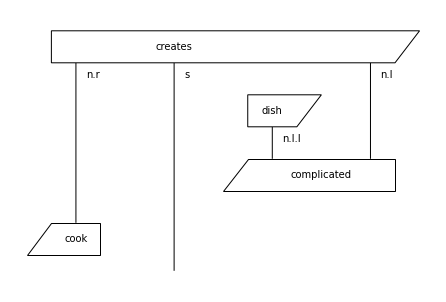

In [11]:
from lambeq import remove_cups

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

train_diagrams[0].draw()

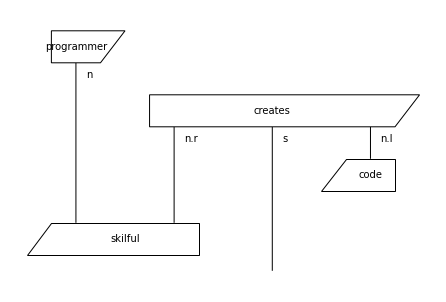

In [12]:
from lambeq import remove_cups

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

train_diagrams[1].draw()

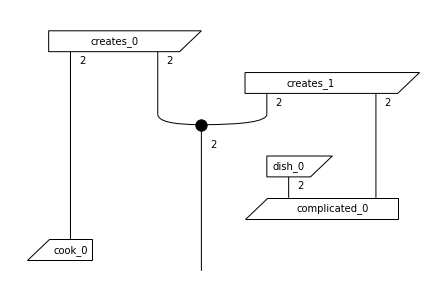

In [13]:
from discopy import Dim

from lambeq import AtomicType, SpiderAnsatz

ansatz = SpiderAnsatz({AtomicType.NOUN: Dim(2),
                       AtomicType.SENTENCE: Dim(2)})

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw()

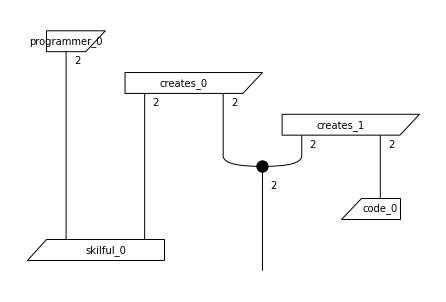

In [14]:
from discopy import Dim

from lambeq import AtomicType, SpiderAnsatz

ansatz = SpiderAnsatz({AtomicType.NOUN: Dim(2),
                       AtomicType.SENTENCE: Dim(2)})

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[1].draw()

### Create circuits

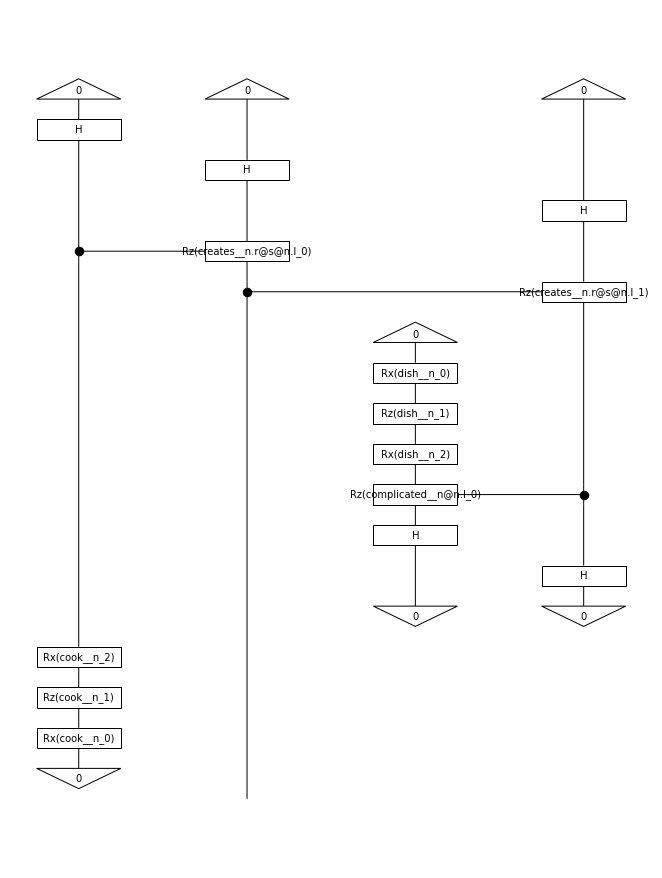

In [15]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 12))

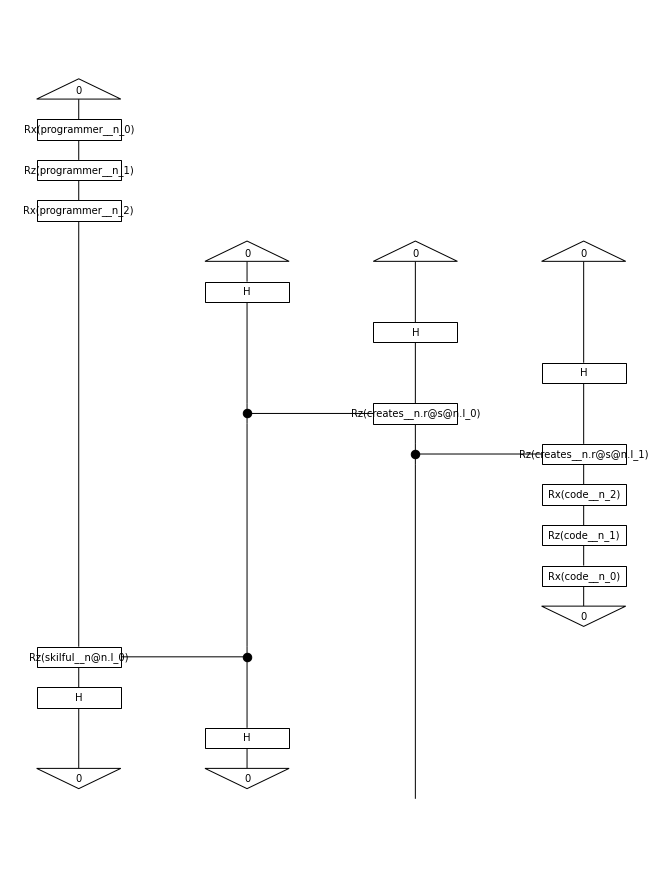

In [16]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[1].draw(figsize=(9, 12))

In [17]:
!pip install pytket-qiskit

  Using cached pytket_qiskit-0.28.0-py3-none-any.whl (36 kB)
  Using cached qiskit-0.37.1-py3-none-any.whl
  Using cached qiskit_terra-0.21.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Using cached qiskit_ibmq_provider-0.19.2-py3-none-any.whl (240 kB)
  Using cached qiskit_aer-0.10.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (18.0 MB)
  Using cached websockets-10.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (111 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached symengine-0.9.2-cp39-cp39-manylinux2010_x86_64.whl (37.5 MB)
  Using cached stevedore-4.0.0-py3-none-any.whl (49 kB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached tweedledum-1.1.1-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (930 kB)
  Using cached retworkx-0.11.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.ma

### Parameterise

In [18]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits+dev_circuits+test_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots':8192 
}
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

### Define evaluation metric

In [19]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

### Initialize trainer

In [20]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [21]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)

### Train

In [22]:
trainer.fit(train_dataset, val_dataset, logging_step=2)

Epoch 1:  train/loss: 1.1338   valid/loss: 1.7963   train/acc: 0.5625   valid/acc: 0.2500
Epoch 2:  train/loss: 1.5808   valid/loss: 2.3595   train/acc: 0.4750   valid/acc: 0.5000
Epoch 4:  train/loss: 0.9222   valid/loss: 0.8989   train/acc: 0.5938   valid/acc: 0.7000
Epoch 6:  train/loss: 1.3621   valid/loss: 2.2122   train/acc: 0.5188   valid/acc: 0.4000

Training completed!


### Show results

Test accuracy: 0.7142857142857143


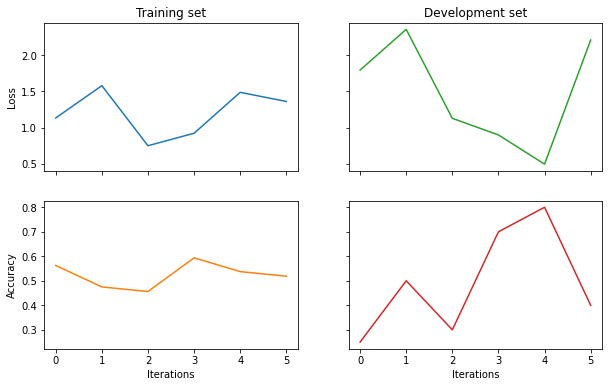

In [23]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))

test_acc = acc(model(test_circuits), test_labels)
print('Test accuracy:', test_acc)

In [24]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.005, 'c': 0.006, 'A':0.001*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [25]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)

In [26]:
trainer.fit(train_dataset, val_dataset, logging_step=2)

Epoch 1:  train/loss: 2.7215   valid/loss: 0.7823   train/acc: 0.4750   valid/acc: 0.5500
Epoch 2:  train/loss: 1.6561   valid/loss: 2.7206   train/acc: 0.4875   valid/acc: 0.3000
Epoch 4:  train/loss: 2.1699   valid/loss: 0.9284   train/acc: 0.4313   valid/acc: 0.5000
Epoch 6:  train/loss: 1.8155   valid/loss: 2.5951   train/acc: 0.5375   valid/acc: 0.2000

Training completed!


Test accuracy: 0.42857142857142855


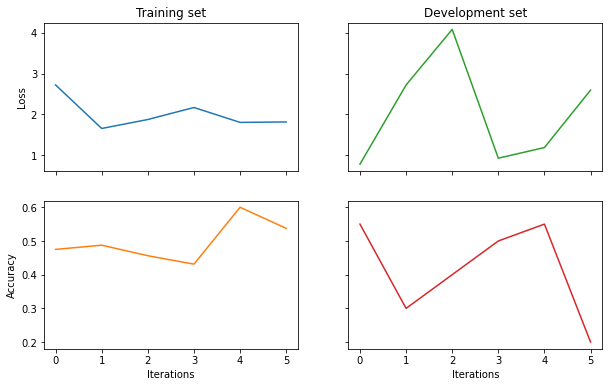

In [27]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))

test_acc = acc(model(test_circuits), test_labels)
print('Test accuracy:', test_acc)